<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Есть данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd #импортировали библиотеку pandas
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t') #прочитали файл и сохранили в переменной data, применив разделитель табуляция
pd.set_option('display.max_columns', None)
display(data.head(30)) # выводим на экран первые 30 строк таблицы
data.info() #получаем сводную информацию о таблице

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Таблица состоит из 22 столбцов и 23699 строчек. Где-то в половине столбцов есть пропуски, необходимо разобраться насколько корректны данные, что мы можем удалить, а что заполнить самостоятельно для корректного расчета и анализа. В датафреме присутствуют разные типы данных: целые и вещественные числа, булев и текстовые. В дальнейшем будем менять тип данных в некоторых столбцах.

## Предобработка данных

In [2]:
data.describe()# проверяем описательную статистику по всем числовым столбцам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #перевели значения в столбцеfirst_day_exposition в дату и время 
data.head() #для проверки вывели первые 5 строк датафрейма


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для начала изменили тип данных в столбце first_day_exposition для работы с временем и датой. Времени у нас нет,да оно нам и не важно для анализа, остается только дата.

In [4]:
print('Пропуски до:',data['floors_total'].isna().sum()) #подсчет пропусков в столбце floors_total
data = data.dropna(subset=['floors_total'])#удаляем строчки с пропусками т.к их немного и на анализ не повлияет
print('Пропуски после:',data['floors_total'].isna().sum()) #подсчетов пропусков после удаления
data['floors_total'] = data['floors_total'].astype(int)# кол-во этажей переводим в целое число

Пропуски до: 86
Пропуски после: 0


В столбце floors_total пропусков немного, поэтому мы можем их удалить и это не повлияет на дальнейший анализ. Остальные значения переводим в целое число, так как количество этажей всегда целое число.

In [5]:
print('Пропуски до:',data['living_area'].isna().sum())#подсчет пропусков в столбце living_area
median_values = data.groupby('rooms').agg({'living_area': 'median'}).rename(columns={'living_area': 'median_living_area'})#создаем фрейм с группировкой по столбцу rooms и подсчетом медианы,получается дополнительная колонка с median_living_area
data = data.merge(median_values, on = ['rooms']) #пристегиваем его к исходному фрейму
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(),'median_living_area']#пропуски заполняем значениями из median_living_area
print('Пропуски после:',data['living_area'].isna().sum())#подсчетов пропусков после

Пропуски до: 1870
Пропуски после: 0


В столбце living_area заполинили пропуски медианными значениями с группировкой по числу комнат, то есть предполагаем, что жилая площадь зависит от числа комнат.

In [6]:
print('Пропуски до:',data['kitchen_area'].isna().sum())#подсчет пропусков в столбце kitchen_area
display(data.query('rooms==0')[['living_area','kitchen_area','studio','open_plan']])#смотри срез, где видим, что пропуски есть там, где студия или открытая планировка
data.loc[(data['kitchen_area'].isna()) & (data['studio']==True),'kitchen_area'] = 0 #можно считать, что в кухнях и открытых планировках нет кухни 
data.loc[(data['kitchen_area'].isna()) & (data['open_plan']==True),'kitchen_area'] = 0 #заполнем пропуски нулем
display(data.query('rooms==0')[['living_area','kitchen_area','studio','open_plan']])#проверяем
print('Пропуски после:',data['kitchen_area'].isna().sum())#проверка пропусков, они остались
median_values = data.groupby('rooms').agg({'kitchen_area': 'median'}).rename(columns={'kitchen_area': 'median_kitchen_area'})#создаем фрейм с группировкой по столбцу rooms и подсчетом медианы,получается дополнительная колонка с median_kitchen_area
data = data.merge(median_values, on = ['rooms']) #пристегиваем его к исходному фрейму
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(),'median_kitchen_area']#пропуски заполняем значениями из median_kitchen_area
print('Пропуски после:',data['kitchen_area'].isna().sum())#подсчетов пропусков после

Пропуски до: 2231


,living_area,kitchen_area,studio,open_plan
23329,15.50,NaN,True,False
23330,17.00,NaN,False,True
23331,24.75,NaN,True,False
23332,24.30,NaN,False,True
23333,18.00,NaN,True,False
...,...,...,...,...
23518,18.00,NaN,True,False
23519,18.00,NaN,False,True
23520,18.00,NaN,True,False
23521,18.00,NaN,False,True


,living_area,kitchen_area,studio,open_plan
23329,15.50,0.0,True,False
23330,17.00,0.0,False,True
23331,24.75,0.0,True,False
23332,24.30,0.0,False,True
23333,18.00,0.0,True,False
...,...,...,...,...
23518,18.00,0.0,True,False
23519,18.00,0.0,False,True
23520,18.00,0.0,True,False
23521,18.00,0.0,False,True


Пропуски после: 2018
Пропуски после: 0


В столбце kitchen_area заметно, что пропуски есть там, где квартира-студия или открытая планировка. Предполагется, что там нет так таковой кухни и поэтому заполняем пропуски нулевым значением. Оставшивеся пропуски заполнили также медианными значениями с группировкой по количеству комнат.

In [7]:
print('Пропуски до:',data['ceiling_height'].isna().sum())#подсчет пропусков в столбце ceiling_height
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()# заполняем пропуски медианными значениями всего столбца, так как высота потолков по столбцу не сильно выбивается
print('Пропуски после:',data['ceiling_height'].isna().sum())#подсчетов пропусков после

Пропуски до: 9118
Пропуски после: 0


Пропуски в столбце ceiling_height заполнили медианными значениями столбца, так как высота потолков примерно одинакова во всех квартирах за редким исключением.

In [8]:
print('Пропуски до:',data['is_apartment'].isna().sum())#подсчет пропусков в столбце is_apartment
data.loc[data['is_apartment'].isna(),'is_apartment'] = False #заполняем пропуски значением False
print('Пропуски после:',data['is_apartment'].isna().sum())#подсчетов пропусков после

Пропуски до: 20838
Пропуски после: 0


В столбце is_apartment предполагаю, что если бы это были апартаменты это бы было указано, а не пропущено. Поэтому пропуски заполняю значением False.

In [9]:
print('Пропуски до:',data['balcony'].isna().sum())#подсчет пропусков в столбце balcony
data.loc[data['balcony'].isna(),'balcony'] = 0 #заполняем пропуски нулем, так как предполагаю, что если бы балкон был,это было бы указано
print('Пропуски после:',data['balcony'].isna().sum())#подсчетов пропусков после
data['balcony'] = data['balcony'].astype(int)# изменяю тип данных на целые числа

Пропуски до: 11480
Пропуски после: 0


Пропуски в столбце balcony заполняем нулем, так как если бы балкон был в квартире это обязательно указали в объявлении, потому что это влияет на стоимость квартиры. Тип данных поменяли на целый, так как балконов всегда целое число.

Пропуски до: 3172


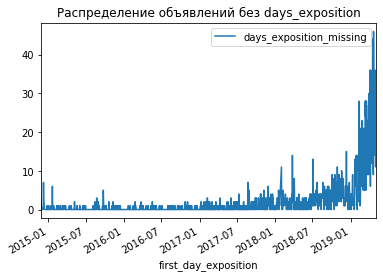

In [10]:
print('Пропуски до:',data['days_exposition'].isna().sum())#подсчет пропусков в столбце days_exposition
import matplotlib.pyplot as plt
data['days_exposition_missing'] = data['days_exposition'].isna().astype(int) #создаем столбец,в котором опредяем пропущена дата или нет
data.groupby('first_day_exposition').agg({'days_exposition_missing':'sum'}).plot() #строим график, суммируя пропуски 
plt.title('Распределение объявлений без days_exposition')
plt.show()


В столбце days_exposition есть пропуски, а так как это дни размещения объявления, то возможно пропуски означают, что объявление еще не снято с публикации и квартира еще продается.Построим график распределения пропусков относительно даты публикации объявления. Мы видим, что больше всего пропусков у более свежих объявлений, поэтому можно предполагать, что квартры не проданы еще. Пропуски оставляем.

In [11]:
print('Пропуски до:',data['locality_name'].isna().sum())#подсчет пропусков в столбце locality_name
data = data.dropna(subset=['locality_name']) #удлляем строки с пропусками, так как их немного
print('Пропуски после:',data['locality_name'].isna().sum())#подсчетов пропусков после
display(data['locality_name'].unique()) #смотрим уникальные значения
for name in ['деревня ', 'поселок ','посёлок ','посёлок городского типа ','городской ','село ','садоводческое некоммерческое товарищество ','городского типа ','садовое товарищество ','станции ','при железнодорожной ','коттеджный ']:
    data['locality_name'] = data['locality_name'].str.replace(name, '') # так как есть разное написание в типе населенных пунктов, то удалим их из данных, оставив только название
display(data['locality_name'].unique()) #посмотрели уникальные значения после переименования

Пропуски до: 48
Пропуски после: 0


array(['Санкт-Петербург', 'посёлок Парголово', 'Гатчина', 'Сертолово',
       'деревня Фёдоровское', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Шушары', 'посёлок городского типа Сиверский', 'Приозерск',
       'деревня Куттузи', 'деревня Заклинье', 'поселок Торковичи',
       'Красное Село', 'Ломоносов', 'Всеволожск', 'посёлок Новый Свет',
       'Шлиссельбург', 'Кингисепп', 'Сосновый Бор', 'поселок Новый Свет',
       'деревня Оржицы', 'Ивангород', 'Кириши', 'Луга', 'Пушкин',
       'Колпино', 'поселок Оредеж', 'Волосово',
       'городской посёлок Янино-1', 'посёлок Металлострой',
       'посёлок Молодёжное', 'Тихвин', 'Кронштадт', 'посёлок Победа',
       'деревня Нурма', 'Тосно', 'Пикалёво', 'Подпорожье', 'Сестрорецк',
       'посёлок городского типа Токсово', 'Выборг', 'деревня Старая',
       'посёлок городского типа Кузьмоловский', 'Петергоф',
       'поселок Севастьяново', 'деревня Кудрово', 'деревня Лопухинка',
       'городской посёлок Лесогорский', 'деревня Лаголо

array(['Санкт-Петербург', 'Парголово', 'Гатчина', 'Сертолово',
       'Фёдоровское', 'Кировск', 'Новое Девяткино', 'Шушары', 'Сиверский',
       'Приозерск', 'Куттузи', 'Заклинье', 'Торковичи', 'Красное Село',
       'Ломоносов', 'Всеволожск', 'Новый Свет', 'Шлиссельбург',
       'Кингисепп', 'Сосновый Бор', 'Оржицы', 'Ивангород', 'Кириши',
       'Луга', 'Пушкин', 'Колпино', 'Оредеж', 'Волосово', 'Янино-1',
       'Металлострой', 'Молодёжное', 'Тихвин', 'Кронштадт', 'Победа',
       'Нурма', 'Тосно', 'Пикалёво', 'Подпорожье', 'Сестрорецк',
       'Токсово', 'Выборг', 'Старая', 'Кузьмоловский', 'Петергоф',
       'Севастьяново', 'Кудрово', 'Лопухинка', 'Лесогорский', 'Лаголово',
       'Цвелодубово', 'Волхов', 'Мурино', 'Батово', 'Приморск',
       'Романовка', 'Сельцо', 'Новая Ладога', 'Тельмана',
       'имени Свердлова', 'Рябово', 'Рощино', 'Сланцы', 'Бугры', 'Тайцы',
       'Отрадное', 'Калитино', 'Ульяновка', 'Малое Карлино', 'Войсковицы',
       'Стрельна', 'Ропша', 'Рабитицы', '

Пропусков в столбце locality_name мало и можем смело их удалять и это не повлияет на анализ. Выгрузив уникальные значения мы замечаем, что есть различия в написаниях типов населенных пунктов. Убираем типы, оставляем только названия

In [12]:
print('Пропуски до:',data['cityCenters_nearest'].isna().sum())# подсчет пропусков в столбце cityCenters_nearest
for name in data['locality_name'].unique(): #создаем цикл для заполнения пропусков медианными значениями с группировкой по названию населенного пункта
    median = data.loc[data['locality_name'] == name, 'cityCenters_nearest'].median() 
    print(name, median)
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == name), 'cityCenters_nearest'] = median
print('Пропуски после:',data['cityCenters_nearest'].isna().sum())# повторно считаем пропуски, они остались, так как не для всех населенных пунктов есть данные
data.loc[data['cityCenters_nearest'].isna(),'cityCenters_nearest'] = data['cityCenters_nearest'].median() #остальное заполняем медианными значениями всего столбца
print('Пропуски после:',data['cityCenters_nearest'].isna().sum())#подсчет пропусков после

Пропуски до: 5501
Санкт-Петербург 12242.0
Парголово 19311.0
Гатчина nan
Сертолово nan
Фёдоровское nan
Кировск nan
Новое Девяткино nan
Шушары 24212.0
Сиверский nan
Приозерск nan
Куттузи nan
Заклинье nan
Торковичи nan
Красное Село 29148.5
Ломоносов 51677.0
Всеволожск nan
Новый Свет nan
Шлиссельбург nan
Кингисепп nan
Сосновый Бор nan
Оржицы nan
Ивангород nan
Кириши nan
Луга nan
Пушкин 27930.5
Колпино 32018.0
Оредеж nan
Волосово nan
Янино-1 nan
Металлострой 27602.0
Молодёжное 65764.0
Тихвин nan
Кронштадт 49575.0
Победа nan
Нурма nan
Тосно nan
Пикалёво nan
Подпорожье nan
Сестрорецк 34821.0


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Токсово nan
Выборг nan
Старая nan
Кузьмоловский nan
Петергоф 33771.0
Севастьяново nan
Кудрово nan
Лопухинка nan
Лесогорский nan
Лаголово nan
Цвелодубово nan
Волхов nan
Мурино nan
Батово nan
Приморск nan
Романовка nan
Сельцо nan
Новая Ладога nan
Тельмана nan
имени Свердлова nan
Рябово nan
Рощино nan
Сланцы nan
Бугры nan
Тайцы nan
Отрадное nan
Калитино nan
Ульяновка nan
Малое Карлино nan
Войсковицы nan
Стрельна 23506.0
Ропша nan
Рабитицы nan
Никольский nan
Назия nan
Репино 42896.5
Лодейное Поле nan
Никольское nan
Синявино nan
Запорожское nan
имени Морозова nan
Зимитицы nan
Коммунар nan
Зеленогорск 53381.0
Павлово nan
Павловск 32683.0
Бокситогорск nan
Светогорск nan
Любань nan
Бегуницы nan
Кривко nan
Агалатово nan
Кузьмолово nan
Мыза-Ивановка nan
Семрино nan
Житково nan
Шпаньково nan
Вещево nan
Гостилицы nan
Возрождение nan
Кикерино nan
Низино nan
Суходолье nan
Рахья nan
Дубровка nan
Большие Колпаны nan
Сясьстрой nan
Горбунки nan
Каменногорск nan
Кипень nan
Аннино nan
Лесная Поляна nan
Жи

Пропуски в столбце cityCenters_nearest пробуем сначала заполнить медианными значениями с группировкой по названию (столбец locality_name). Часть пропусков заполнилась, остальные заполняем медианными значениями по всему набору данных столбца cityCenters_nearest.

In [13]:
print('Пропуски до:',data['parks_around3000'].isna().sum())# подсчет пропусков в столбце parks_around3000
for name in data['locality_name'].unique():#создаем цикл для заполнения пропусков медианными значениями с группировкой по названию населенного пункта
    median = data.loc[data['locality_name'] == name, 'parks_around3000'].median()
    print(name, median)
    data.loc[(data['parks_around3000'].isna()) & (data['locality_name'] == name), 'parks_around3000'] = median
print('Пропуски после:',data['parks_around3000'].isna().sum())# повторно считаем пропуски, они остались, так как не для всех населенных пунктов есть данные
data.loc[data['parks_around3000'].isna(),'parks_around3000'] = data['parks_around3000'].median()#остальное заполняем медианными значениями всего столбца
print('Пропуски после:',data['parks_around3000'].isna().sum())#подсчет пропусков после

Пропуски до: 5500
Санкт-Петербург 0.0
Парголово 0.0
Гатчина nan
Сертолово nan
Фёдоровское nan
Кировск nan
Новое Девяткино nan
Шушары 0.0
Сиверский nan
Приозерск nan
Куттузи nan
Заклинье nan
Торковичи nan
Красное Село 0.0
Ломоносов 0.0
Всеволожск nan
Новый Свет nan
Шлиссельбург nan
Кингисепп nan
Сосновый Бор nan
Оржицы nan
Ивангород nan
Кириши nan
Луга nan
Пушкин 1.0
Колпино 0.0
Оредеж nan
Волосово nan
Янино-1 nan
Металлострой 0.0
Молодёжное 0.0
Тихвин nan
Кронштадт 2.0
Победа nan
Нурма nan
Тосно nan
Пикалёво nan
Подпорожье nan
Сестрорецк 0.0
Токсово nan
Выборг nan
Старая nan
Кузьмоловский nan
Петергоф 1.0
Севастьяново nan
Кудрово nan
Лопухинка nan
Лесогорский nan
Лаголово nan
Цвелодубово nan
Волхов nan
Мурино nan
Батово nan
Приморск nan
Романовка nan
Сельцо nan
Новая Ладога nan
Тельмана nan
имени Свердлова nan
Рябово nan
Рощино nan
Сланцы nan
Бугры nan
Тайцы nan
Отрадное nan
Калитино nan
Ульяновка nan
Малое Карлино nan
Войсковицы nan
Стрельна 0.0
Ропша nan
Рабитицы nan
Никольский nan
Н

Пропуски в столбце parks_around3000 также пробуем сначала заполнить медианными значениями с группировкой по названию (столбец locality_name). Часть пропусков заполнилась, остальные заполняем медианными значениями по всему набору данных столбца parks_around3000.

In [14]:
print('Пропуски до:',data['parks_nearest'].isna().sum())# подсчет пропусков в столбце parks_nearest
for name in data['locality_name'].unique():#создаем цикл для заполнения пропусков медианными значениями с группировкой по названию населенного пункта
    median = data.loc[data['locality_name'] == name, 'parks_nearest'].median()
    print(name, median)
    data.loc[(data['parks_nearest'].isna()) & (data['parks_nearest'] == name), 'parks_nearest'] = median
print('Пропуски после:',data['parks_nearest'].isna().sum())# повторно считаем пропуски, они остались, так как не для всех населенных пунктов есть данные
data.loc[data['parks_nearest'].isna(),'parks_nearest'] = data['parks_nearest'].median()#остальное заполняем медианными значениями всего столбца
print('Пропуски после:',data['parks_nearest'].isna().sum())#подсчет пропусков после

Пропуски до: 15535
Санкт-Петербург 460.0
Парголово 733.0
Гатчина nan
Сертолово nan
Фёдоровское nan
Кировск nan
Новое Девяткино nan
Шушары nan
Сиверский nan
Приозерск nan
Куттузи nan
Заклинье nan
Торковичи nan
Красное Село 435.0
Ломоносов 407.0
Всеволожск nan
Новый Свет nan
Шлиссельбург nan
Кингисепп nan
Сосновый Бор nan
Оржицы nan
Ивангород nan
Кириши nan
Луга nan
Пушкин 399.5
Колпино 393.0
Оредеж nan
Волосово nan
Янино-1 nan
Металлострой nan
Молодёжное nan
Тихвин nan
Кронштадт 293.0
Победа nan
Нурма nan
Тосно nan
Пикалёво nan
Подпорожье nan
Сестрорецк 367.0
Токсово nan
Выборг nan
Старая nan
Кузьмоловский nan
Петергоф 294.0
Севастьяново nan
Кудрово nan
Лопухинка nan
Лесогорский nan
Лаголово nan


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Цвелодубово nan
Волхов nan
Мурино nan
Батово nan
Приморск nan
Романовка nan
Сельцо nan
Новая Ладога nan
Тельмана nan
имени Свердлова nan
Рябово nan
Рощино nan
Сланцы nan
Бугры nan
Тайцы nan
Отрадное nan
Калитино nan
Ульяновка nan
Малое Карлино nan
Войсковицы nan
Стрельна 700.0
Ропша nan
Рабитицы nan
Никольский nan
Назия nan
Репино nan
Лодейное Поле nan
Никольское nan
Синявино nan
Запорожское nan
имени Морозова nan
Зимитицы nan
Коммунар nan
Зеленогорск 147.5
Павлово nan
Павловск 312.0
Бокситогорск nan
Светогорск nan
Любань nan
Бегуницы nan
Кривко nan
Агалатово nan
Кузьмолово nan
Мыза-Ивановка nan
Семрино nan
Житково nan
Шпаньково nan
Вещево nan
Гостилицы nan
Возрождение nan
Кикерино nan
Низино nan
Суходолье nan
Рахья nan
Дубровка nan
Большие Колпаны nan
Сясьстрой nan
Горбунки nan
Каменногорск nan
Кипень nan
Аннино nan
Лесная Поляна nan
Жилгородок nan
Лебяжье nan
Новоселье nan
Важины nan
Мга nan
Приладожский nan
Лесколово nan
Лукаши nan
Виллози nan
Русско-Высоцкое nan
Извара nan
Малые Ко

Пропуски в столбце parks_nearest также пробуем сначала заполнить медианными значениями с группировкой по названию (столбец locality_name). Проспуски не заполнились, заполняем медианными значениями по всему набору данных столбца parks_nearest.

In [15]:
print('Пропуски до:',data['ponds_nearest'].isna().sum())# подсчет пропусков в столбце ponds_nearest
for name in data['locality_name'].unique():#создаем цикл для заполнения пропусков медианными значениями с группировкой по названию населенного пункта
    median = data.loc[data['locality_name'] == name, 'ponds_nearest'].median()
    print(name, median)
    data.loc[(data['ponds_nearest'].isna()) & (data['ponds_nearest'] == name), 'ponds_nearest'] = median
print('Пропуски после:',data['ponds_nearest'].isna().sum())# повторно считаем пропуски, они остались, так как не для всех населенных пунктов есть данные
data.loc[data['ponds_nearest'].isna(),'ponds_nearest'] = data['ponds_nearest'].median()#остальное заполняем медианными значениями всего столбца
print('Пропуски после:',data['ponds_nearest'].isna().sum())#подсчет пропусков после

Пропуски до: 14529
Санкт-Петербург 504.0
Парголово 593.0
Гатчина nan
Сертолово nan
Фёдоровское nan
Кировск nan
Новое Девяткино nan
Шушары 584.5
Сиверский nan
Приозерск nan
Куттузи nan
Заклинье nan
Торковичи nan
Красное Село 225.5
Ломоносов 553.0
Всеволожск nan
Новый Свет nan
Шлиссельбург nan
Кингисепп nan
Сосновый Бор nan
Оржицы nan
Ивангород nan
Кириши nan
Луга nan
Пушкин 444.0
Колпино 509.0
Оредеж nan
Волосово nan
Янино-1 nan
Металлострой nan
Молодёжное nan
Тихвин nan
Кронштадт 312.0
Победа nan
Нурма nan
Тосно nan
Пикалёво nan
Подпорожье nan
Сестрорецк 372.0
Токсово nan
Выборг nan
Старая nan
Кузьмоловский nan
Петергоф 474.0
Севастьяново nan
Кудрово nan
Лопухинка nan
Лесогорский nan
Лаголово nan
Цвелодубово nan
Волхов nan
Мурино nan
Батово nan
Приморск nan
Романовка nan
Сельцо nan
Новая Ладога nan
Тельмана nan
имени Свердлова nan
Рябово nan
Рощино nan
Сланцы nan
Бугры nan
Тайцы nan
Отрадное nan
Калитино nan
Ульяновка nan
Малое Карлино nan
Войсковицы nan
Стрельна 859.0
Ропша nan
Рабити

Пропуски в столбце ponds_nearest также пробуем сначала заполнить медианными значениями с группировкой по названию (столбец locality_name). Проспуски не заполнились, заполняем медианными значениями по всему набору данных столбца ponds_nearest.

In [16]:
print('Пропуски до:',data['ponds_around3000'].isna().sum())# подсчет пропусков в столбце ponds_around3000
for name in data['locality_name'].unique():#создаем цикл для заполнения пропусков медианными значениями с группировкой по названию населенного пункта
    median = data.loc[data['locality_name'] == name, 'ponds_around3000'].median()
    print(name, median)
    data.loc[(data['ponds_around3000'].isna()) & (data['ponds_around3000'] == name), 'ponds_around3000'] = median
print('Пропуски после:',data['ponds_around3000'].isna().sum())# повторно считаем пропуски, они остались, так как не для всех населенных пунктов есть данные
data.loc[data['ponds_around3000'].isna(),'ponds_around3000'] = data['ponds_around3000'].median()#остальное заполняем медианными значениями всего столбца
print('Пропуски после:',data['ponds_around3000'].isna().sum())#подсчет пропусков после

Пропуски до: 5500
Санкт-Петербург 1.0
Парголово 0.0
Гатчина nan
Сертолово nan
Фёдоровское nan
Кировск nan
Новое Девяткино nan
Шушары 0.0
Сиверский nan
Приозерск nan
Куттузи nan
Заклинье nan
Торковичи nan
Красное Село 0.0
Ломоносов 1.0
Всеволожск nan
Новый Свет nan
Шлиссельбург nan
Кингисепп nan
Сосновый Бор nan
Оржицы nan
Ивангород nan
Кириши nan
Луга nan
Пушкин 0.0
Колпино 1.0
Оредеж nan
Волосово nan
Янино-1 nan
Металлострой 0.0
Молодёжное 0.0
Тихвин nan
Кронштадт 2.0
Победа nan
Нурма nan
Тосно nan
Пикалёво nan
Подпорожье nan
Сестрорецк 1.0
Токсово nan
Выборг nan
Старая nan
Кузьмоловский nan
Петергоф 1.0
Севастьяново nan
Кудрово nan
Лопухинка nan
Лесогорский nan
Лаголово nan
Цвелодубово nan
Волхов nan
Мурино nan
Батово nan
Приморск nan
Романовка nan
Сельцо nan
Новая Ладога nan
Тельмана nan
имени Свердлова nan
Рябово nan
Рощино nan
Сланцы nan
Бугры nan
Тайцы nan
Отрадное nan
Калитино nan
Ульяновка nan
Малое Карлино nan
Войсковицы nan
Стрельна 1.0
Ропша nan
Рабитицы nan
Никольский nan
Н

Пропуски в столбце ponds_around3000 также пробуем сначала заполнить медианными значениями с группировкой по названию (столбец locality_name). Проспуски не заполнились, заполняем медианными значениями по всему набору данных столбца ponds_around3000.

In [17]:
print('Пропуски до:',data['airports_nearest'].isna().sum())# подсчет пропусков в столбце airports_nearest
for name in data['locality_name'].unique():#создаем цикл для заполнения пропусков медианными значениями с группировкой по названию населенного пункта
    median = data.loc[data['locality_name'] == name, 'airports_nearest'].median()
    print(name, median)
    data.loc[(data['airports_nearest'].isna()) & (data['airports_nearest'] == name), 'airports_nearest'] = median

print('Пропуски после:',data['airports_nearest'].isna().sum())## повторно считаем пропуски, они остались, так как не для всех населенных пунктов есть данные
data.loc[data['airports_nearest'].isna(),'airports_nearest'] = data['airports_nearest'].median()#остальное заполняем медианными значениями всего столбца
print('Пропуски после:',data['airports_nearest'].isna().sum())#подсчет пропусков после

Пропуски до: 5524
Санкт-Петербург 26763.0
Парголово 53426.0
Гатчина nan
Сертолово nan
Фёдоровское nan
Кировск nan
Новое Девяткино nan
Шушары 17427.0
Сиверский nan
Приозерск nan
Куттузи nan
Заклинье nan
Торковичи nan
Красное Село 25723.5
Ломоносов 48415.5
Всеволожск nan
Новый Свет nan
Шлиссельбург nan
Кингисепп nan
Сосновый Бор nan
Оржицы nan
Ивангород nan
Кириши nan
Луга nan
Пушкин 15766.0
Колпино 26232.0
Оредеж nan
Волосово nan
Янино-1 nan
Металлострой 25758.0
Молодёжное 84665.0
Тихвин nan
Кронштадт 67850.0
Победа nan
Нурма nan
Тосно nan
Пикалёво nan
Подпорожье nan
Сестрорецк 56692.0
Токсово nan
Выборг nan
Старая nan
Кузьмоловский nan
Петергоф 39231.0
Севастьяново nan
Кудрово nan
Лопухинка nan
Лесогорский nan
Лаголово nan
Цвелодубово nan
Волхов nan
Мурино nan
Батово nan
Приморск nan
Романовка nan
Сельцо nan
Новая Ладога nan
Тельмана nan
имени Свердлова nan
Рябово nan
Рощино nan
Сланцы nan
Бугры nan
Тайцы nan
Отрадное nan
Калитино nan
Ульяновка nan
Малое Карлино nan
Войсковицы nan
Стре

Пропуски в столбце airports_nearest также пробуем сначала заполнить медианными значениями с группировкой по названию (столбец locality_name). Проспуски не заполнились, заполняем медианными значениями по всему набору данных столбца airports_nearest.

In [18]:
display(data.tail(40)) #выводим последние 40 строк датафрейма для наглядной проверки
data.info() #выводим сводную информацию о датафрейме для проверки


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing
23573,7,22160000.0,277.6,2017-08-19,7,3.80,6,211.0,3,False,False,False,17.8,0,Санкт-Петербург,25761.0,5671.0,2.0,375.0,1.0,479.0,22.0,145.00,20.00,0
23574,8,15000000.0,145.2,2019-03-07,7,2.65,2,115.0,2,False,False,False,15.0,0,Санкт-Петербург,26288.0,5135.0,1.0,545.0,0.0,503.0,NaN,145.00,20.00,1
23575,19,130000000.0,431.0,2017-10-02,7,3.70,8,220.0,5,False,False,False,20.0,5,Санкт-Петербург,26757.0,12242.0,0.0,455.0,1.0,503.0,161.0,145.00,20.00,0
23576,12,19500000.0,287.5,2017-12-27,7,2.65,4,183.7,3,False,False,False,26.0,0,Санкт-Петербург,21881.0,4726.0,1.0,578.0,1.0,853.0,90.0,145.00,20.00,0
23577,20,22000000.0,141.0,2019-01-24,7,2.65,5,84.0,2,False,False,False,25.0,0,Санкт-Петербург,20243.0,3334.0,2.0,447.0,1.0,468.0,90.0,145.00,20.00,0
23578,12,25000000.0,196.0,2016-11-04,7,3.50,6,145.0,5,False,False,False,17.0,1,Санкт-Петербург,25083.0,3658.0,1.0,552.0,0.0,503.0,NaN,145.00,20.00,1
23579,18,22900000.0,206.0,2016-04-04,7,2.65,6,142.0,2,False,False,False,16.2,0,Санкт-Петербург,25079.0,5544.0,0.0,455.0,1.0,251.0,75.0,145.00,20.00,0
23580,17,30000000.0,213.0,2017-09-28,7,3.40,5,151.4,5,False,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0,145.00,20.00,0
23581,5,15350000.0,158.5,2019-03-07,7,2.95,7,57.4,7,False,False,False,12.4,1,Санкт-Петербург,23546.0,3088.0,1.0,347.0,0.0,503.0,NaN,145.00,20.00,1
23582,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,455.0,0.0,503.0,NaN,133.90,12.60,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23612
Data columns (total 25 columns):
total_images               23565 non-null int64
last_price                 23565 non-null float64
total_area                 23565 non-null float64
first_day_exposition       23565 non-null datetime64[ns]
rooms                      23565 non-null int64
ceiling_height             23565 non-null float64
floors_total               23565 non-null int64
living_area                23565 non-null float64
floor                      23565 non-null int64
is_apartment               23565 non-null bool
studio                     23565 non-null bool
open_plan                  23565 non-null bool
kitchen_area               23565 non-null float64
balcony                    23565 non-null int64
locality_name              23565 non-null object
airports_nearest           23565 non-null float64
cityCenters_nearest        23565 non-null float64
parks_around3000           23565 non-null float64
park

После предобработки данных мы избавились от пропусков в датафрейме,удалив их или заполнив медианными значениями. Изменили типы данных, где это необходимо.  Пропуски остались только в столбце days_exposition, так как проанализировав мы поняли, что пропуски там неслучайны, квартиры еще не проданы на момент выгрузки данных. Данные готовы к расчетам и анализу.  

## Расчёты и добавление результатов в таблицу

Добавляем в таблицу день недели, месяц и год публикации объявления

In [19]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #создаем столбец со значением месяца из даты столбца first_day_exposition 
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #создаем столбец со значением года из даты столбца first_day_exposition 
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #создаем столбец со значением дня недели из даты столбца first_day_exposition 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,45.0,9.5,1,3,2019,3
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,45.0,9.5,0,7,2015,4
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,455.0,0.0,503.0,289.0,45.0,9.5,0,2,2017,6
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,503.0,397.0,45.0,9.5,0,11,2017,3
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,455.0,0.0,503.0,97.0,45.0,9.5,0,1,2019,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23612
Data columns (total 28 columns):
total_images               23565 non-null int64
last_price                 23565 non-null float64
total_area                 23565 non-null float64
first_day_exposition       23565 non-null datetime64[ns]
rooms                      23565 non-null int64
ceiling_height             23565 non-null float64
floors_total               23565 non-null int64
living_area                23565 non-null float64
floor                      23565 non-null int64
is_apartment               23565 non-null bool
studio                     23565 non-null bool
open_plan                  23565 non-null bool
kitchen_area               23565 non-null float64
balcony                    23565 non-null int64
locality_name              23565 non-null object
airports_nearest           23565 non-null float64
cityCenters_nearest        23565 non-null float64
parks_around3000           23565 non-null float64
park

Присваиваем значению этажа квартиры категории — первый, последний, другой

In [21]:
def floors(row): #создаем функцию для присваивания категории этажа
    if row['floor'] == 1:
        return 'первый'
    if row['floor']  == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_group'] = data.apply(floors, axis=1) #значения категории отображаем в новом столбце floor_group
data.head(10) #выводим на экран певрые 10 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,45.0,9.5,1,3,2019,3,другой
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,45.0,9.5,0,7,2015,4,другой
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,455.0,0.0,503.0,289.0,45.0,9.5,0,2,2017,6,другой
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,503.0,397.0,45.0,9.5,0,11,2017,3,первый
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,455.0,0.0,503.0,97.0,45.0,9.5,0,1,2019,2,другой
5,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,False,False,False,12.0,2,Парголово,53134.0,19311.0,0.0,455.0,0.0,503.0,74.0,45.0,9.5,0,9,2017,3,другой
6,20,7100000.0,70.0,2017-05-12,3,2.60,17,49.0,11,False,False,False,9.2,0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0,45.0,9.5,0,5,2017,4,другой
7,9,8600000.0,100.0,2016-04-09,3,2.65,19,52.0,15,False,False,False,11.0,0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0,45.0,9.5,0,4,2016,5,другой
8,7,4990000.0,60.0,2016-05-22,3,2.65,5,39.0,4,False,False,False,6.0,0,Санкт-Петербург,11349.0,12889.0,0.0,455.0,1.0,426.0,224.0,45.0,9.5,0,5,2016,6,другой
9,16,7900000.0,74.0,2016-05-04,3,2.65,14,59.0,8,False,False,False,12.0,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0,45.0,9.5,0,5,2016,2,другой


Считаем и добавляем в таблицу цену квадратного метра

In [22]:
data['price_one_metre'] = data['last_price']/data['total_area'] #добавляем новый столбец price_one_metre со значением цены за кв.метр
data['price_one_metre'] = data['price_one_metre'].astype(int) #изменяем тип данных на целое число для удобства
data.head() #выводим первые 5 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday,floor_group,price_one_metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,45.0,9.5,1,3,2019,3,другой,120370
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,45.0,9.5,0,7,2015,4,другой,408176
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,455.0,0.0,503.0,289.0,45.0,9.5,0,2,2017,6,другой,88524
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,503.0,397.0,45.0,9.5,0,11,2017,3,первый,81707
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,455.0,0.0,503.0,97.0,45.0,9.5,0,1,2019,2,другой,117355


Считаем и добавляем в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [23]:
data['living_ratio'] = ((data['living_area']/data['total_area'])*100).round(2) #добавляем столбец living_ratio со значением соотношения жилой площади к обшей в %
data['kitchen_ratio'] = ((data['kitchen_area']/data['total_area'])*100).round(2)#добавляем столбец living_ratio со значением соотношения  площади кухни к обшей в %
data.head()#выводим первые 5 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday,floor_group,price_one_metre,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,45.0,9.5,1,3,2019,3,другой,120370,47.22,23.15
1,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,45.0,9.5,0,7,2015,4,другой,408176,28.30,5.97
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,455.0,0.0,503.0,289.0,45.0,9.5,0,2,2017,6,другой,88524,71.48,10.66
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,503.0,397.0,45.0,9.5,0,11,2017,3,первый,81707,67.80,10.98
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,455.0,0.0,503.0,97.0,45.0,9.5,0,1,2019,2,другой,117355,62.81,9.92


В данной части провели необходимые расчеты для дальнейшего исследовательского анализа: посчитали цену за квадратный метр, извлекли в отдельные столбцы месяц,год и день недели даты публикации объявления, посчитали соотношение жилой площади и площади кухни к общей площади квартиры, присволи категории для столбца floor.

## Исследовательский анализ данных

Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. строим гистограммы для каждого параметра.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

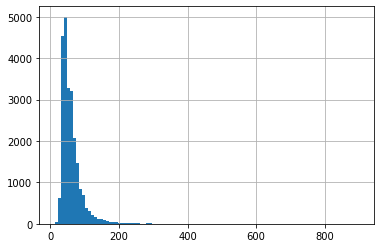

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

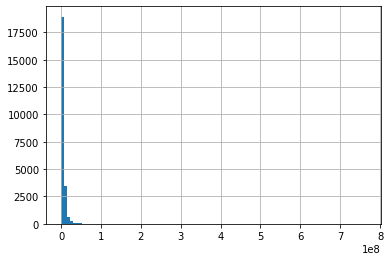

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

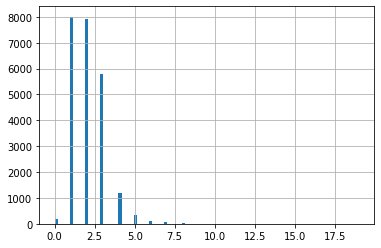

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

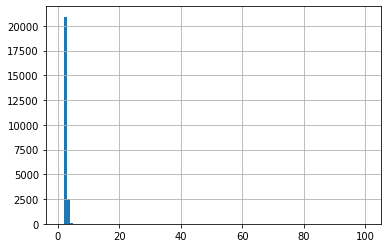

In [24]:
import matplotlib.pyplot as plt #импорт библиотеки для построения графиков
columns = ['total_area','last_price','rooms','ceiling_height'] # создаем список столбцов, по которым построим гистограммы
for column in columns: #создаем цикл
    display(data[column].describe()) #для каждого столбца выводим числовое описание данных
    data[column].hist(bins=100) # строим гистограммы 
    plt.show()

По total_area,last_price,rooms,ceiling_height вывели числовое описание данных и построили диаграммы.
По total_area видим, что большинство квартир имеют площадь почти 70 квадратных метров, что правдободно и реально. Но максимальное(900 кв.м) и минимальное(12 кв.м) значение сильно выбивается.
По столбцу last_price сложно определить адекватность данных. будем смотреть дальше.
По столбцу rooms  в основном квартиры имеют 3 комнаты, что реально, но есть и 0 комнат, возможно это студии или открытые планировки. Максимальное значение 19 слишклм выбивается, предполагаю, что это выброс.
По столбцу ceiling_height мы видим в большинстве случаев адекватное значение высоты потолков, но максимальное значение (100 м) явно нереально и его надо исключить. Также минимальное значение равное единицы тоже вызывает подозрение.




Для более наглядного примера и понимания, какие значения редкие и выбивающиеся, я построила диаграммы рассеивания.

36000000.0

1000000.0

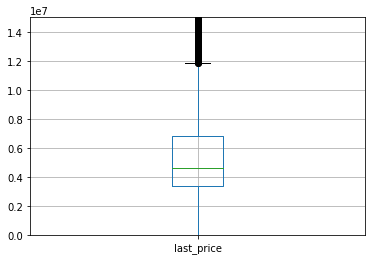

In [25]:
data.boxplot(column='last_price') #строим диаграмму рассеивания
plt.ylim(0, 15000000)
display(data['last_price'].quantile(0.99))#рассчитываем 99% перцентиль, который примерно показывает границу верхнего уса
data['last_price'].quantile(0.01)#рассчитываем 1% перцентиль, который примерно показывает границу нижнего уса

5.0

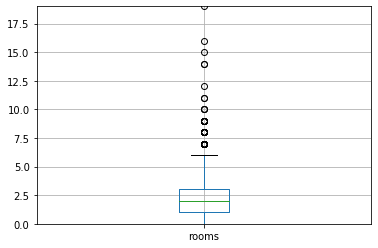

In [26]:
data.boxplot(column='rooms')#строим диаграмму рассеивания
plt.ylim(0, 19)
data['rooms'].quantile(0.99)#рассчитываем 99% перцентиль, который примерно показывает границу верхнего уса


25.319200000000002

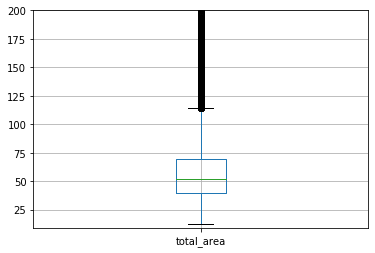

In [27]:
data.boxplot(column='total_area')#строим диаграмму рассеивания
plt.ylim(9, 200)
data['total_area'].quantile(0.99)#рассчитываем 99% перцентиль, который примерно показывает границу верхнего уса
data['total_area'].quantile(0.01)#рассчитываем 1% перцентиль, который примерно показывает границу нижнего уса

3.6

2.5

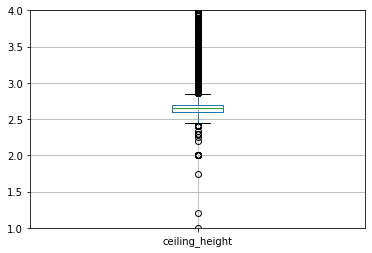

In [28]:
data.boxplot(column='ceiling_height')#строим диаграмму рассеивания
plt.ylim(1, 4)
display(data['ceiling_height'].quantile(0.99))#рассчитываем 99% перцентиль, который примерно показывает границу верхнего уса
display(data['ceiling_height'].quantile(0.01))#рассчитываем 1% перцентиль, который примерно показывает границу нижнего уса


Наглядно мы видим все квартили по total_area,last_price,rooms,ceiling_height и посчитали 99% квартиль, то есть то, что выше этого значения - аномалии и от них надо избавиться. По столбцу ceiling_height считаю, что высота потолка не может быть 1 метр, посмотрела перцентиль 1%, можно удалять данные меньше 2.5. Также посчитали перцентиль 1% для столбцов total_area,last_price. Удалим все аномалии больше 99% перцентиль и меньше 1% перцентиль.

Изучаем время продажи квартиры. 

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

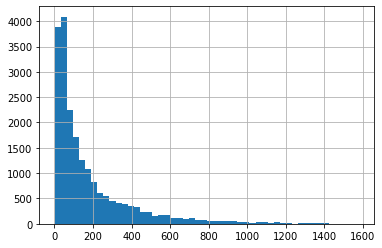

1067.1399999999994

In [29]:
display(data['days_exposition'].describe())#выводим числовое описание данных
data['days_exposition'].hist(bins=50)#строим гистограмму
plt.show()
display(data['days_exposition'].quantile(0.99))#рассчитываем 99% перцентиль, который примерно показывает границу верхнего уса

По days_exposition мы видим, что чаще всего квартиры продают до 200 дней с момента публикации. В среднем 180 дней, 50% продаж (медиана) проходит за 95 дней. Минимальное значение единица, то есть есть случаи продажи квартиры за 1 день. Максимальное значение 1580 дней, это слишком выбивающиеся значение. 99% квартиль имеет значение 1067, то есть то, что выше аномалии.

Убираем редкие и выбивающиеся значения. 

In [30]:
data_new = data[(data['days_exposition']<1067) | (data['days_exposition'].isna())] #фильтруем даныые по столбцу  days_exposition
data_new = data_new.query('rooms<6 and 1000000<last_price<36000000 and 2.5<ceiling_height<3.6 and 25<total_area<197') #фильтруем данные по столбцам rooms, last_price,ceiling_height,total_area
display(data_new.head(20))#выводим первые 20 строк отфильтрованного датафрейма
data_new.info() #выводим сводную таблицу отфильтрованного датафрейма 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday,floor_group,price_one_metre,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,45.0,9.5,1,3,2019,3,другой,120370,47.22,23.15
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.60,1,False,False,False,9.00,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,503.0,397.0,45.0,9.5,0,11,2017,3,первый,81707,67.80,10.98
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.00,8,False,False,False,12.00,0,Санкт-Петербург,38900.0,12843.0,0.0,455.0,0.0,503.0,97.0,45.0,9.5,0,1,2019,2,другой,117355,62.81,9.92
5,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.00,11,False,False,False,12.00,2,Парголово,53134.0,19311.0,0.0,455.0,0.0,503.0,74.0,45.0,9.5,0,9,2017,3,другой,76500,60.00,15.00
6,20,7100000.0,70.0,2017-05-12,3,2.60,17,49.00,11,False,False,False,9.20,0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0,45.0,9.5,0,5,2017,4,другой,101428,70.00,13.14
7,9,8600000.0,100.0,2016-04-09,3,2.65,19,52.00,15,False,False,False,11.00,0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0,45.0,9.5,0,4,2016,5,другой,86000,52.00,11.00
8,7,4990000.0,60.0,2016-05-22,3,2.65,5,39.00,4,False,False,False,6.00,0,Санкт-Петербург,11349.0,12889.0,0.0,455.0,1.0,426.0,224.0,45.0,9.5,0,5,2016,6,другой,83166,65.00,10.00
9,16,7900000.0,74.0,2016-05-04,3,2.65,14,59.00,8,False,False,False,12.00,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0,45.0,9.5,0,5,2016,2,другой,106756,79.73,16.22
10,17,3600000.0,56.1,2018-10-18,3,2.65,4,42.50,3,False,False,False,5.70,1,Гатчина,26757.0,13073.0,0.0,455.0,1.0,503.0,179.0,45.0,9.5,0,10,2018,3,другой,64171,75.76,10.16
12,0,4800000.0,78.6,2017-09-17,3,2.80,9,48.80,5,False,False,False,11.90,2,Сертолово,26757.0,13073.0,0.0,455.0,1.0,503.0,5.0,45.0,9.5,0,9,2017,6,другой,61068,62.09,15.14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18757 entries, 0 to 23522
Data columns (total 32 columns):
total_images               18757 non-null int64
last_price                 18757 non-null float64
total_area                 18757 non-null float64
first_day_exposition       18757 non-null datetime64[ns]
rooms                      18757 non-null int64
ceiling_height             18757 non-null float64
floors_total               18757 non-null int64
living_area                18757 non-null float64
floor                      18757 non-null int64
is_apartment               18757 non-null bool
studio                     18757 non-null bool
open_plan                  18757 non-null bool
kitchen_area               18757 non-null float64
balcony                    18757 non-null int64
locality_name              18757 non-null object
airports_nearest           18757 non-null float64
cityCenters_nearest        18757 non-null float64
parks_around3000           18757 non-null float64
park

На основании полученных графиков и расчетов избавляемся от аномалий и выбивающихся значений в датафрейме через фильтр. Таких значений было не очень много, в таблице осталось 18757 строк.

Изучаем: Какие факторы больше всего влияют на стоимость квартиры? 

Корреляция между стоимостью за квадратный метр и total_area
0.17
Корреляция между стоимостью за квадратный метр и rooms
-0.05
Корреляция между стоимостью за квадратный метр и cityCenters_nearest
-0.28
Корреляция между стоимостью за квадратный метр и month
-0.01
Корреляция между стоимостью за квадратный метр и year
0.07
Корреляция между стоимостью за квадратный метр и weekday
-0.02
Корреляция между стоимостью за квадратный метр и ceiling_height
0.27


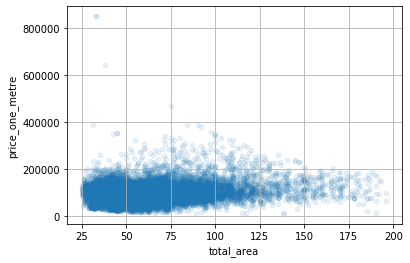

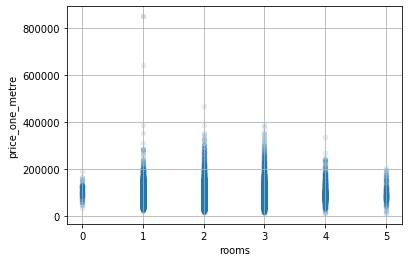

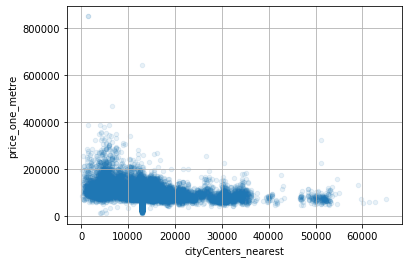

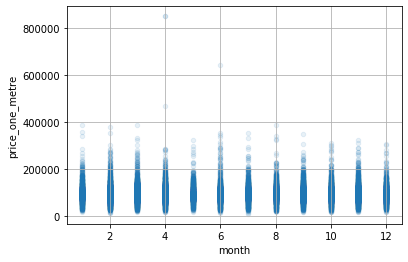

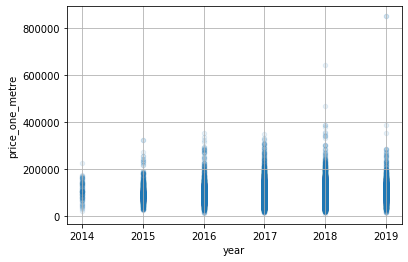

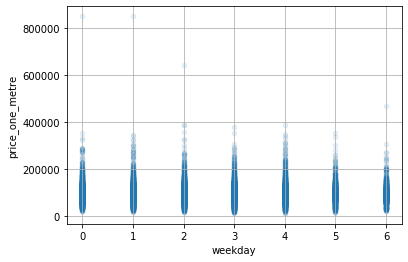

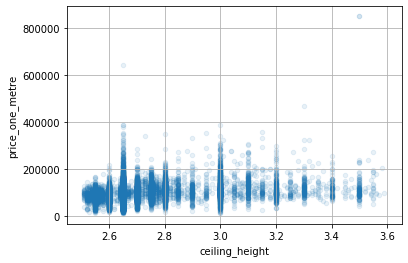

In [31]:
factor_price = ['total_area','rooms','cityCenters_nearest','month','year','weekday','ceiling_height'] #создали список столбцов, значение которых изучаем
for factor in factor_price: #через цикл считаем корреляцию и строим графики
    print(f'Корреляция между стоимостью за квадратный метр и {factor}')
    print((data_new['price_one_metre'].corr(data_new[factor])).round(2))
    data_new.plot(x=factor,y='price_one_metre',kind='scatter',alpha=0.1,grid=True)
    

На основе расчета коээфициента корреляции и графиков мы отметить, что сильной зависимости от цены квадратного метра и площади квартиры, количества комнат, удаленности от центра, даты публикации объявления, высоты потолков - нет.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 250000)

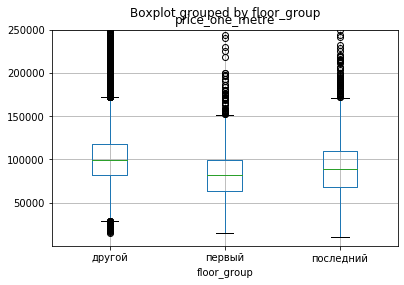

In [32]:
data_new.boxplot(column='price_one_metre',by='floor_group') #строим диаграмму размаха
plt.ylim(1,250000)

Сильной разница цены за квадратный метр от этажа не наблюдается. Чуть меньше цена у первого этажа и чуть дороже у квартир на  другом этаже(50% квартир на другом этаже стоят 100000 за кв.метр). В жизни так и есть, цены за первый этаж всегда ниже.

Изучаем 10 населённых пунктов с наибольшим числом объявлений

In [33]:
data_new_pivot = data.pivot_table(index = ['locality_name'], values = 'price_one_metre', aggfunc = ['count','mean']) #группируем по названию и считает среднюю цену за метр кв
data_new_pivot .columns = ['total','average']
data_new_pivot  = data_new_pivot.sort_values(by = ['total'], ascending=False) #сортируем по убыванию количества объяявлений
display(data_new_pivot.head(10)) #выводим 10 первых


,total,average
locality_name,,
Санкт-Петербург,15651,114868.433902
Мурино,586,86040.658703
Кудрово,470,95260.393617
Шушары,439,78550.883827
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
Парголово,327,90175.489297
Гатчина,307,68745.693811


С помощью сводной таблицы посчитали среднюю цену за квадратной метр в 10 населённых пунктов с наибольшим числом объявлений. Максимальная цена за квадратной метр в Санкт-Петербурге, минимальная - Выборге. Разница в цене в 2 раза!

Изучаем квартиры в Санкт-Петербурге,выясняем, какая область входит в центр

In [34]:
data_new_spb = data_new.query('locality_name in "Санкт-Петербург"') #срезаем данные по Санкт-Петербургу
display(data_new_spb.head())
data_new_spb['cityCenters_nearest_km'] = (data_new_spb['cityCenters_nearest']/1000).astype(int) #переводим расстояние до центра в километры, округляем до целых
display(data_new_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday,floor_group,price_one_metre,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,45.0,9.5,1,3,2019,3,другой,120370,47.22,23.15
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,503.0,397.0,45.0,9.5,0,11,2017,3,первый,81707,67.80,10.98
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,455.0,0.0,503.0,97.0,45.0,9.5,0,1,2019,2,другой,117355,62.81,9.92
6,20,7100000.0,70.0,2017-05-12,3,2.60,17,49.0,11,False,False,False,9.2,0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0,45.0,9.5,0,5,2017,4,другой,101428,70.00,13.14
7,9,8600000.0,100.0,2016-04-09,3,2.65,19,52.0,15,False,False,False,11.0,0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0,45.0,9.5,0,4,2016,5,другой,86000,52.00,11.00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday,floor_group,price_one_metre,living_ratio,kitchen_ratio,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,45.0,9.5,1,3,2019,3,другой,120370,47.22,23.15,16
3,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,503.0,397.0,45.0,9.5,0,11,2017,3,первый,81707,67.80,10.98,10
4,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,455.0,0.0,503.0,97.0,45.0,9.5,0,1,2019,2,другой,117355,62.81,9.92,12
6,20,7100000.0,70.0,2017-05-12,3,2.60,17,49.0,11,False,False,False,9.2,0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0,45.0,9.5,0,5,2017,4,другой,101428,70.00,13.14,11
7,9,8600000.0,100.0,2016-04-09,3,2.65,19,52.0,15,False,False,False,11.0,0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0,45.0,9.5,0,4,2016,5,другой,86000,52.00,11.00,11


In [35]:
data_new_spb_pivot = data_new_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'price_one_metre', aggfunc = 'mean') #считаем среднюю цену для каждого километра.
print(data_new_spb_pivot)

                        price_one_metre
cityCenters_nearest_km                 
0                         128389.781818
1                         140178.563953
2                         121234.575893
3                         120080.313364
4                         132410.529491
5                         135952.650327
6                         135586.022959
7                         131959.596386
8                         120843.966490
9                         111611.063177
10                        112406.104828
11                        106800.101651
12                        110035.591821
13                        107971.888889
14                        105837.861600
15                        103482.055504
16                        102000.190887
17                         96337.690176
18                         96550.512195
19                         94620.758065
20                        107621.095890
21                         91330.311111
22                         88651.325581


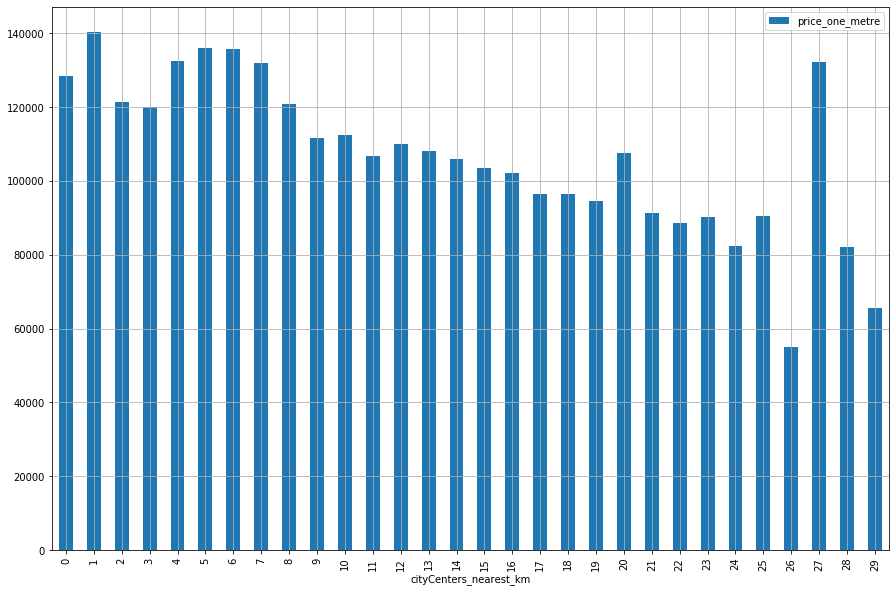

In [36]:
data_new_spb_pivot.plot(kind='bar',grid=True,figsize=(15,10)) #рисуем столбчатую диаграмм зависимости цены от удалённости от центра

Самые дорогие квартиры на первом километре от центра Петербурга. Оно и понятно, это исторический центр.  Также выделяется 4-7 километр, возможно это новостройки, ближайшие к центру. Также выделяется 27 километр, могу предположить, что это какой-то элитный поселок в Ленинградской области.

Выделяем сегмент квартир в центре

In [37]:
data_new_spb_center = data_new_spb.query('cityCenters_nearest_km<=3') #выделяем центральную зону Саанкт-Петербурга
display(data_new_spb_center)   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_living_area,median_kitchen_area,days_exposition_missing,month,year,weekday,floor_group,price_one_metre,living_ratio,kitchen_ratio,cityCenters_nearest_km
48,2,7900000.0,71.8,2017-08-23,3,3.00,5,38.7,1,False,False,False,12.0,0,Санкт-Петербург,22036.0,3301.0,0.0,455.0,1.0,585.0,NaN,45.000,9.50,1,8,2017,2,первый,110027,53.90,16.71,3
63,16,22000000.0,119.0,2017-02-16,3,3.50,5,56.0,3,False,False,False,35.0,0,Санкт-Петербург,21698.0,2004.0,1.0,688.0,1.0,86.0,77.0,45.000,9.50,0,2,2017,3,другой,184873,47.06,29.41,2
84,16,7100000.0,50.0,2016-04-20,3,2.65,5,31.5,1,False,False,False,5.0,0,Санкт-Петербург,21341.0,2043.0,2.0,377.0,1.0,411.0,900.0,45.000,9.50,0,4,2016,2,первый,142000,63.00,10.00,2
100,2,11400000.0,81.2,2016-04-27,3,2.65,3,45.7,2,False,False,False,14.3,0,Санкт-Петербург,23128.0,2669.0,0.0,455.0,3.0,611.0,89.0,45.000,9.50,0,4,2016,2,другой,140394,56.28,17.61,2
109,11,6950000.0,77.0,2018-02-01,3,2.65,5,40.0,3,False,False,False,13.3,0,Санкт-Петербург,25019.0,3349.0,2.0,471.0,0.0,503.0,134.0,45.000,9.50,0,2,2018,3,другой,90259,51.95,17.27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23199,11,19500000.0,126.2,2018-02-01,5,2.65,4,91.8,4,False,False,False,13.0,0,Санкт-Петербург,22779.0,1698.0,2.0,368.0,3.0,270.0,64.0,91.785,15.05,0,2,2018,3,последний,154516,72.74,10.30,1
23200,19,15490000.0,148.0,2018-01-20,5,2.65,5,96.0,3,False,False,False,20.0,0,Санкт-Петербург,21563.0,2439.0,1.0,199.0,1.0,802.0,252.0,91.785,15.05,0,1,2018,5,другой,104662,64.86,13.51,2
23203,15,9850000.0,96.0,2018-07-13,5,3.00,7,68.0,1,False,False,False,7.0,0,Санкт-Петербург,21934.0,1483.0,0.0,455.0,2.0,539.0,87.0,91.785,15.05,0,7,2018,4,первый,102604,70.83,7.29,1
23208,15,14000000.0,155.0,2015-04-03,5,2.65,6,100.0,4,False,False,False,20.0,0,Санкт-Петербург,23585.0,3126.0,1.0,329.0,1.0,848.0,947.0,91.785,15.05,0,4,2015,4,другой,90322,64.52,12.90,3


Корреляция между стоимостью за квадратный метр в центре и total_area
-0.14
Корреляция между стоимостью за квадратный метр в центре и rooms
-0.24
Корреляция между стоимостью за квадратный метр в центре и cityCenters_nearest_km
-0.11
Корреляция между стоимостью за квадратный метр в центре и month
-0.06
Корреляция между стоимостью за квадратный метр в центре и year
0.13
Корреляция между стоимостью за квадратный метр в центре и weekday
-0.04
Корреляция между стоимостью за квадратный метр в центре и ceiling_height
0.1


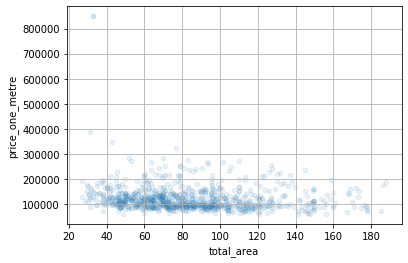

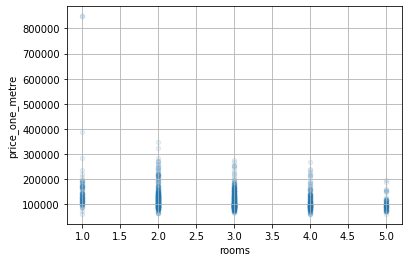

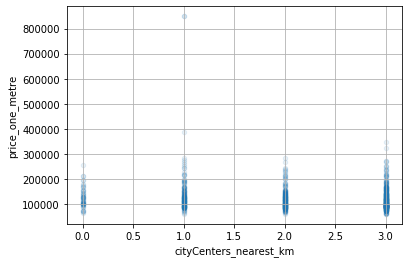

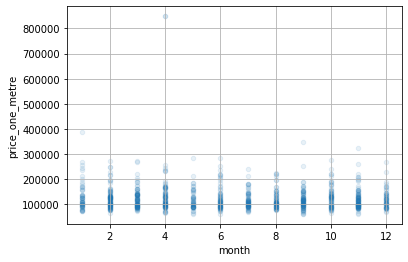

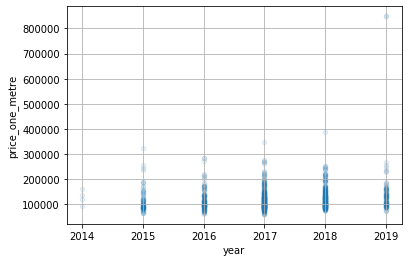

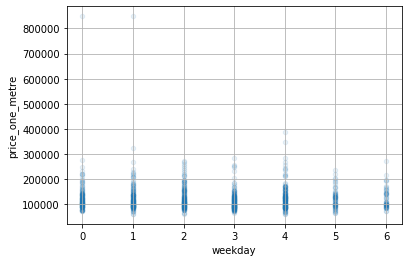

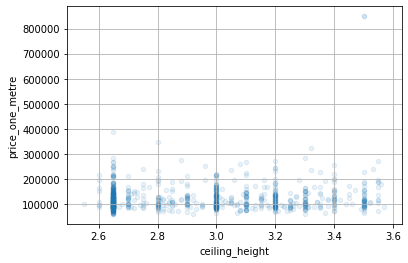

In [38]:
factor_price = ['total_area','rooms','cityCenters_nearest_km','month','year','weekday','ceiling_height']#создали список столбцов, значение которых изучаем
for factor in factor_price: #через цикл строим график и считаем корреляцию
    print(f'Корреляция между стоимостью за квадратный метр в центре и {factor}')
    print((data_new_spb_center['price_one_metre'].corr(data_new_spb_center[factor])).round(2))
    data_new_spb_center.plot(x=factor,y='price_one_metre',kind='scatter',alpha=0.1,grid=True)

В центральной части Санкт-Петербурга мы тоже не наблюдаем зависимости цены квадратного метра от площали квартиры, количества комнат, расстояния от центра, даты публикации объявления и высоты потолков.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 250000)

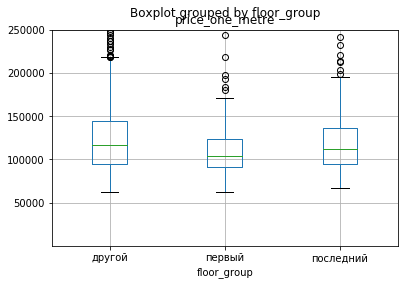

In [39]:
data_new_spb_center.boxplot(column='price_one_metre',by='floor_group')#строим диаграмму рассеивания 
plt.ylim(1,250000)

В центре Петерубурга также квартиры на первом этаже стоят чуть дешевле, чем на других этажах. Но цены уже чуть дороже, чем в остальных районах Петербурга.

## Общий вывод

В ходе анализа на основе предоставленных данных можно сделать вывод, что максимальная цена за квадратный метр квартиры в Санкт-Петербурге. Цены в центре города выше, чем в других районах. Но на цену квадратного метра не влияют такие факторы, как площадь квартиры, число комнат, удалённости от центра,этаж,дата публикации. Это касается, как центральной части Санкт-Петербурга, так и других районов города. 